# Function with matrix multiplication

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict
from typing import List

In [2]:
np.set_printoptions(precision=4)
# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]
            

## Write a function to compute matrix multiplication:

In [5]:
def matmul_forward(X: ndarray, W: ndarray) -> ndarray:
    '''
    For matrix multiplication, the number of columns in the first array should match the
    number of rows in the second, instead the number of columns in the first array is {0}
    and the number of rows in the second array is {1}
    
    Forward multiplication collapses the features and weights into a single value
    to be passed to the perceptron's/neural net's decision-making function.
    '''
    
    assert X.shape[1] == W.shape[0], \
    """The number of columns in the first array should match the
    number of rows in the second."""
    
    # do matrix multiplication
    N = np.dot(X, W)
    
    return N
    

### Math:

$$ X = \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{bmatrix} $$

$$ W = \begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32} \\
\end{bmatrix} $$

$$ \nu(X, W) = X * W = \begin{bmatrix}
x_{11} * w_{11} + x_{12} * w_{21} + x_{13} * w_{31} &
x_{11} * w_{12} + x_{12} * w_{22} + x_{13} * w_{32}
\\
x_{21} * w_{11} + x_{22} * w_{21} + x_{23} * w_{31} &
x_{21} * w_{12} + x_{22} * w_{22} + x_{23} * w_{32}
\\
x_{31} * w_{11} + x_{32} * w_{21} + x_{33} * w_{31} &
x_{31} * w_{12} + x_{32} * w_{22} + x_{33} * w_{32}
\end{bmatrix} = 
\begin{bmatrix}
XW_{11} &
XW_{12}
\\
XW_{21} &
XW_{22}
\\
XW_{31} &
XW_{32}
\end{bmatrix}
$$

### Solution:

In [25]:
def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    '''
    Computes the forward pass of a matrix multiplication
    '''
    
    assert X.shape[1] == W.shape[0], \
    '''
    For matrix multiplication, the number of columns in the first array should match the
    number of rows in the second, instead the number of columns in the first array is {0}
    and the number of rows in the second array is {1}
    '''.format(X.shape[1], W.shape[0])

    # matrix multiplication
    N = np.dot(X, W)

    return N

## Write a function to compute the derivative of functions with multiple vector inputs:

In [6]:
def matmul_backward_first(X: ndarray, W: ndarray) -> ndarray:
    """Get derivative with respect to X.
    
    Backwards multiplication gets the new weights for the model from the N output.
    """
    
    dNdX = np.transpose(W, (1, 0))
    
    return dNdX
    
    

### Math:

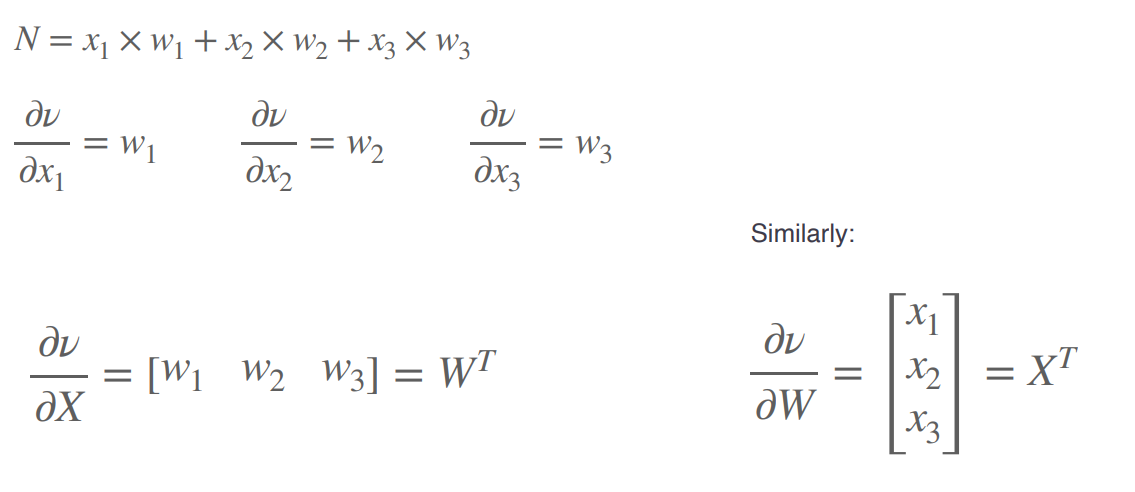

### Solution:

In [26]:
def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    Computes the backward pass of a matrix multiplication with respect to the first argument.
    '''

    # backward pass
    dNdX = np.transpose(W, (1, 0))

    return dNdX

### Example of using matmul_backward_first() on two random vectors:

In [7]:
np.random.seed(190203)

X = np.random.randn(1,3)
W = np.random.randn(3,1)

print(X)
matmul_backward_first(X, W)

[[ 0.4723  0.6151 -1.7262]]


array([[ 0.9282, -0.6075, -1.2214]])

In [8]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    '''
    Computes the forward pass of a function involving matrix multiplication, one extra function
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    return S

# Derivative of a function with matrix multiplication

If: 

* $X$ is $m x n$
* $W$ is $n x p$

Then $X * W$ will be $m x p$:

If the derivative of a loss with respect to each output $N$ is $m x p$, then

* $\frac{\partial N}{\partial X} = N * W^T$ (`np.dot((m,p), (p,n)) = m x n`
* $\frac{\partial N}{\partial W} = X^T * N$ (`np.dot((n,m), (m,p)) = n x p`

In particular, the matrix multiplication on the backward pass must be done in this order.

In [9]:
def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivative of a function "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

## Write a function that returns the derivate of a matrix function:

In [12]:
def matrix_function_backward_1(X:ndarray, W:ndarray, sigma:Array_Function) -> ndarray:
    
    # During the chain rule, you first derive the outer function and leave the inner function intact.
    # This is that intact inner function (x1*w1 + x2*w2 + x3*w3)
    sigma_input = np.dot(X, W)
    
    # First part (derived sigma function)
    dSigma_dU = deriv(sigma, sigma_input)
    
    # Second part (derived input to sigma)
    dNu_dX = np.transpose(W, (1, 0))
    
    return np.dot(dSigma_dU, dNu_dX)
    
    
    

### Math:

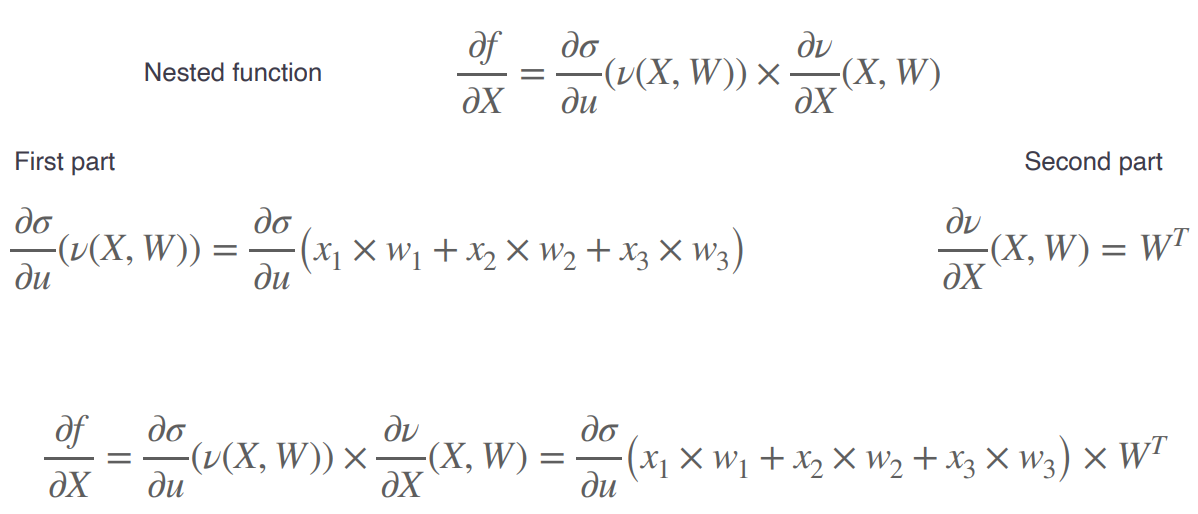

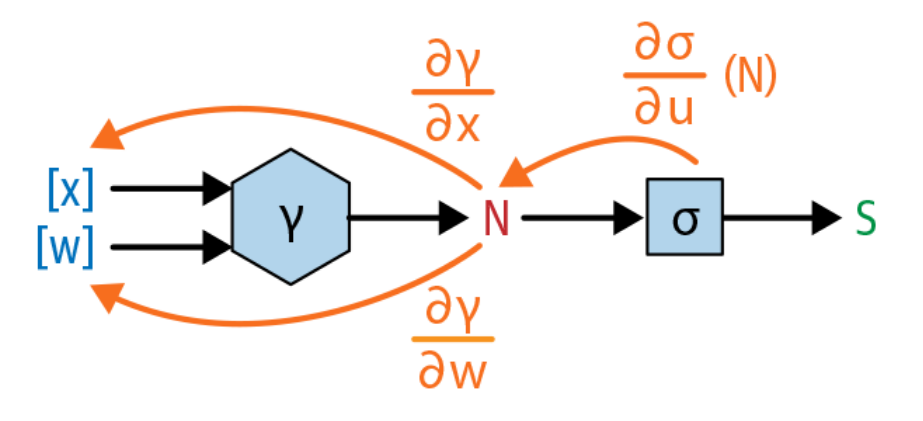

### Solution:

In [30]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of our matrix function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

### Testing and Checking:

In [11]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.0852 -0.0557 -0.1121]]


In [32]:
def forward_test(ind1, ind2, inc):
    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

### Use the above forward test function to modify the input and test if our earlier functions work correctly:

In [ ]:
#Test and check here






### Math:

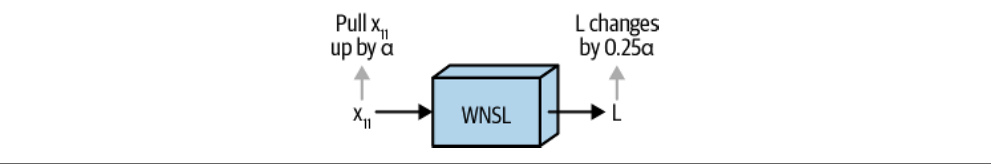

### Solution:

In [33]:
(np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01

array([[-0.11]])

In [34]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)

-0.11

Same! Gradients check.

# Matrix function with sum

In [35]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    '''
    Computing the result of the forward pass of this function with
    input ndarrays X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    # Normally, this isn't done, since we only need N to do backpropagation?
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [36]:
def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    '''
    Computes the derivative of this function with respect to
    the first element.
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = deriv(sigma, N)

    # dNdX
    dNdX = np.transpose(W.transpose(0, 1))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

# Matrix function with two 2D matrices

### Write a function to compute the derivative of a matrix function for two 2D matrices:

In [13]:
def matrix_function_backward_sum_1(X:ndarray, W:ndarray, sigma:Array_Function) -> ndarray:
    """Previously, X and W were one-dimensional matrices, and taking their dot product yielded one number as a sum.
    Now X and W are two-dimensional matrices, and their dot product is another matrix. Sigmoid acts on each element
    of the N matrix, so we need an additional step to sum up all the elements of N"""
    
    N = np.dot(X, W)
    
    # Part 1
    S = sigma(N)
    dLam_du = np.ones_like(S) # dLdS - creates a matrix of just 1s
    
    # Part 2
    dSigma_dU = deriv(sigma, N)
    
    # Part 3 (aka dNu/dX(X,W) )
    wT = np.transpose(W, (1, 0))
    
    return np.dot(dSigma_du, wT)

### Math:

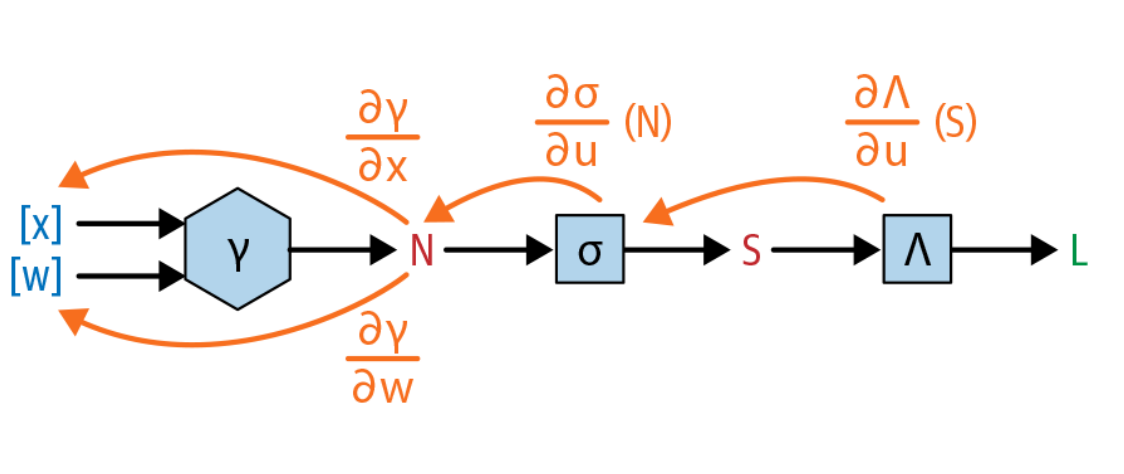
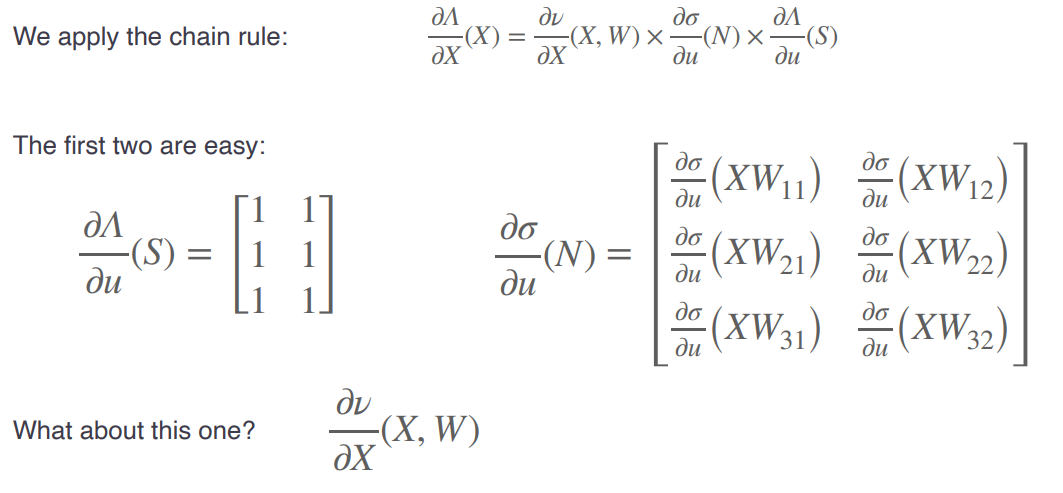
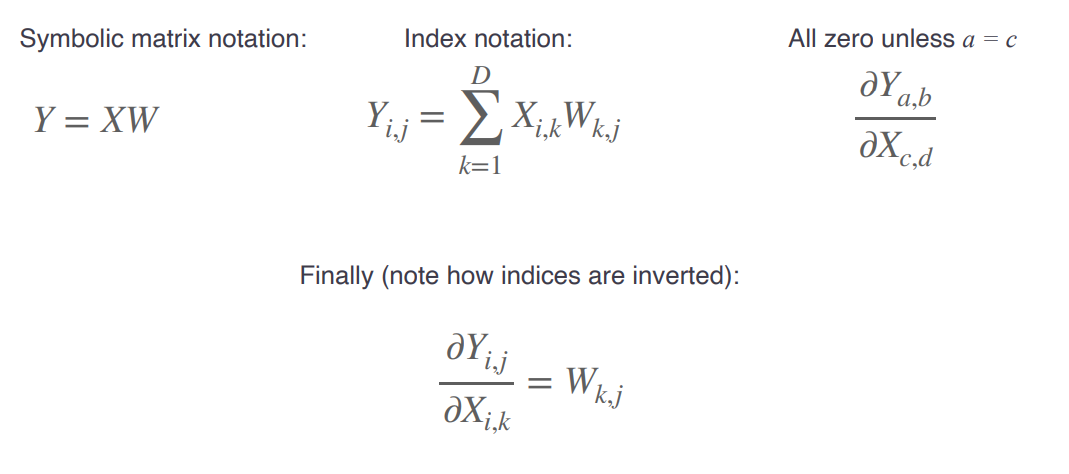
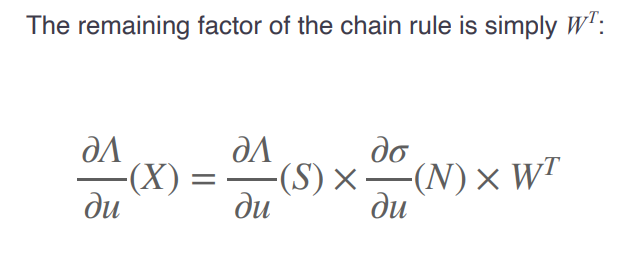

### Solution:

In [37]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    '''
    Compute derivative of matrix function with a sum with respect to the
    first matrix input
    '''
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    # note: I'll refer to the derivatives by their quantities here,
    # unlike the math where we referred to their function names

    # dLdS - just 1s
    dLdS = np.ones_like(S)

    # dSdN
    dSdN = deriv(sigma, N)
    
    # dLdN
    # dLdN = dLdS * dSdN

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # dLdX
    dLdX = np.dot(dSdN, dNdX)

    return dLdX

## Testing

In [40]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)

print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
print(matrix_function_backward_sum_1(X, W , sigmoid))

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]
L:
2.3755

dLdX:
[[ 0.2489 -0.3748  0.0112]
 [ 0.126  -0.2781 -0.1395]
 [ 0.2299 -0.3662 -0.0225]]


### Test the matrix functions by incrementing the input:

In [41]:
#Testing and checking here:

X1 = X.copy()




### Math:

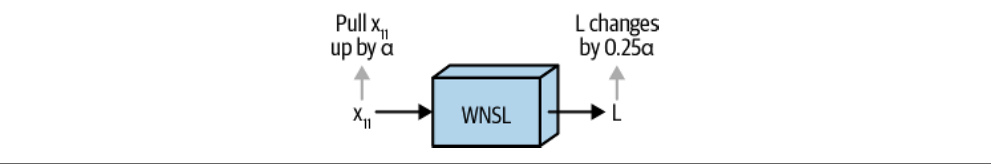

### Solution:

In [42]:
X1[0, 0] += 0.001

print(round(
        (matrix_function_forward_sum(X1, W, sigmoid) - \
         matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4))

0.2489


Same again!

### Plotting

In [43]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    '''
    Computing the result of the forward pass of this function with
    input Tensors X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]
    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11

    # matrix multiplication
    N = np.dot(X1, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [44]:
print("X:")
print(X)

X:
[[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]


In [45]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

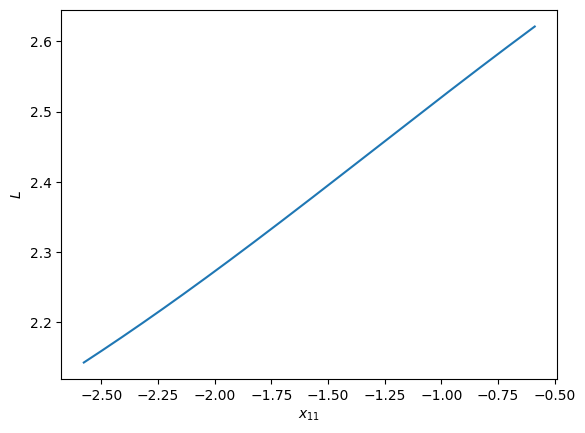

In [46]:
plt.plot(x11s, Ls);
plt.xlabel("$x_{11}$")
plt.ylabel("$L$");
